In [20]:
from parflow.tools.io import read_pfb, write_pfb
from parflow import Run
import numpy as np
import matplotlib.pyplot as plt

In [21]:

n = read_pfb('outputs/Dynamic_Spinup.out.n.pfb')
alpha = read_pfb('outputs/Dynamic_Spinup.out.alpha.pfb')
theta_s = 1.0
theta_r = 0.01

In [26]:
for t in range(366):
    pressure = read_pfb('outputs/Dynamic_Spinup.out.press.'+str(t).zfill(5)+'.pfb')
    pressure[pressure < -4000] = np.nan
    pressure[pressure > 0] = 0

    saturation = theta_r + (theta_s - theta_r)/((1+(alpha*(-pressure))**n)**(1-1/n))
    saturation[saturation == np.inf] = np.nan
    write_pfb('outputs/Dynamic_Spinup.out.satur.'+str(t).zfill(5)+'.pfb', saturation)

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_60692\2049120550.py:6: RuntimeWarning: divide by zero encountered in divide
  saturation = theta_r + (theta_s - theta_r)/((1+(alpha*(-pressure))**n)**(1-1/n))


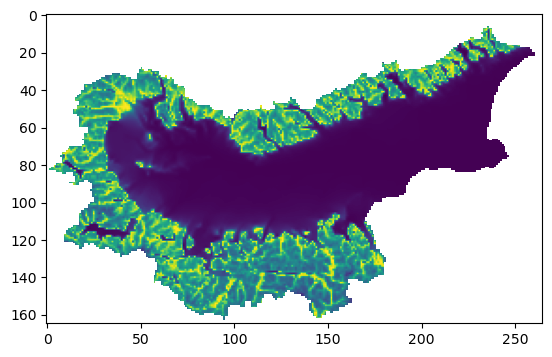

In [19]:
plt.imshow(saturation[0,:,:])